In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('project1_UpdatedResumeDataSet.csv')

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(962, 2)

In [6]:
type(data['Category'][0])

str

In [7]:
type(data['Resume'][0])

str

In [8]:
len(data['Category'].unique())

25

In [9]:
(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [10]:
data['Category'].value_counts().values

array([84, 70, 55, 48, 45, 44, 42, 40, 40, 40, 40, 40, 40, 36, 33, 30, 30,
       30, 28, 28, 26, 25, 24, 24, 20], dtype=int64)

In [11]:
labels = data['Category'].unique()
counts = data['Category'].value_counts()

# plots

<Axes: xlabel='count', ylabel='Category'>

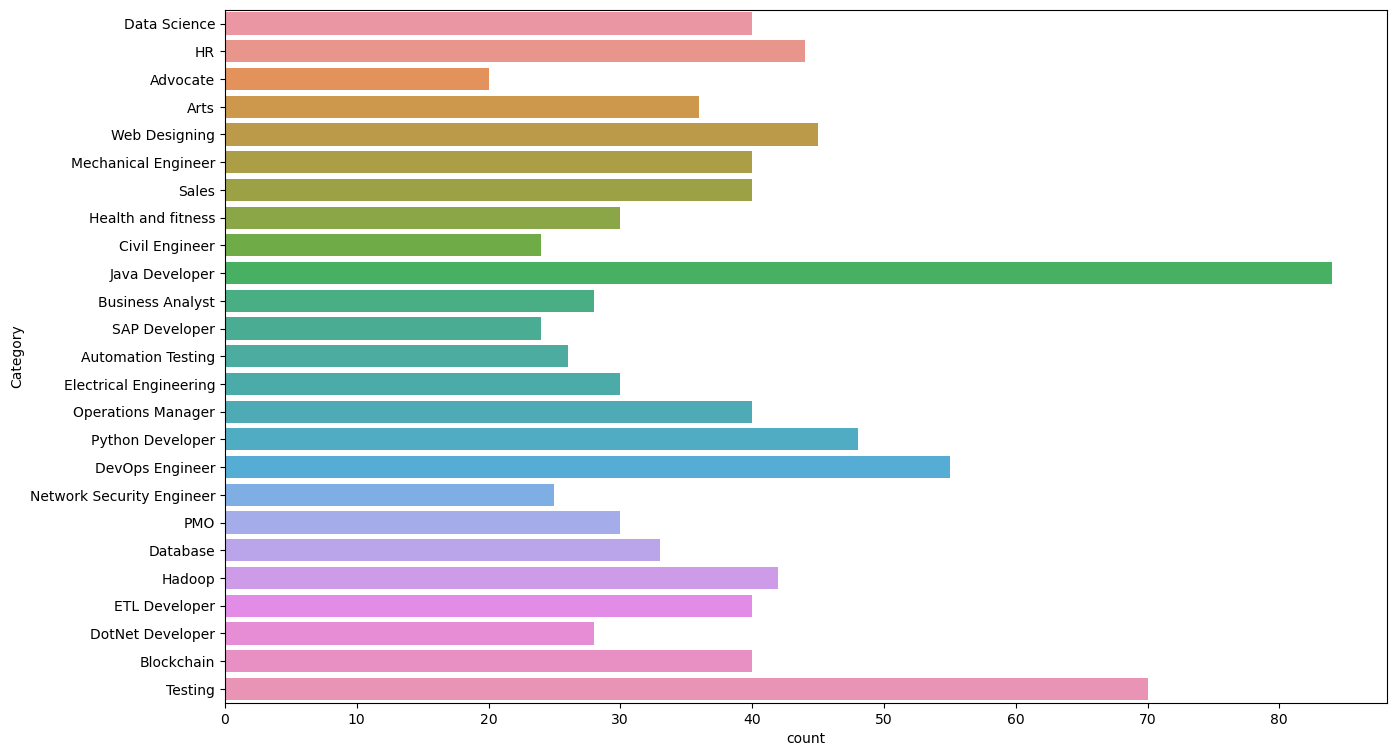

In [12]:
plt.figure(figsize=(15,9))
sb.countplot(data=data, y='Category')

# Cleaning of the resume

In [13]:
data['Resume'][0]  # we can see all the back slashes \r, links etc, we need to remove them

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [14]:
import re

In [15]:
def clean_resume(txt):
    removeLinks = re.sub('http\S+\s',' ',txt)
    removeMail = re.sub('@\S+',' ',removeLinks)
    removehash = re.sub('#\S+',' ',removeMail)
    removeSpChar = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', removehash)
    removeNonAscii = re.sub(r'[^\x00-\x7f]', ' ',removeSpChar ) 
    removelinebreaks = re.sub('\s+', ' ', removeNonAscii)

    CleanData = removelinebreaks
    
    return CleanData

In [16]:
print(clean_resume(data['Resume'][0]))

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the 

# Applying on whole data

In [17]:
data['Resume'] = data['Resume'].apply(lambda x:clean_resume(x))

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])
data['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [52]:
encoded_categories = data['Category'].unique()

# Vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
word2vector_encoder = TfidfVectorizer(stop_words='english')

vectored_text  = word2vector_encoder.fit_transform(data['Resume'])

In [22]:
vectored_text

<962x7347 sparse matrix of type '<class 'numpy.float64'>'
	with 164120 stored elements in Compressed Sparse Row format>

# Training using this text

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(vectored_text,data['Category'],test_size=0.2,random_state=42)

# Training the model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
ypredKNC = KNC.predict(x_test)
print(accuracy_score(y_test,ypredKNC))

0.9844559585492227


In [28]:
from sklearn.multiclass import OneVsRestClassifier
onerest_classifier = OneVsRestClassifier(KNeighborsClassifier())
onerest_classifier.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [29]:
ypredONC = onerest_classifier.predict(x_test)
print(accuracy_score(y_test,ypredONC))

0.9844559585492227


In [30]:
ypredONC

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

## saving the model

In [31]:
import pickle
pickle.dump(onerest_classifier,open('trained_model.pkl','wb'))
pickle.dump(word2vector_encoder,open('word2vec_encoder.pkl','wb'))

## using the trained -> saved model

In [34]:
import pickle as pkl

In [35]:
model = pkl.load(open('trained_model.pkl','rb'))
encoder = pkl.load(open('word2vec_encoder.pkl','rb'))

In [36]:
random_resume = """
John Doe

123 Main Street, Anytown, USA | (555) 123-4567 | johndoe@email.com

Objective:
Highly motivated and detail-oriented individual seeking a challenging position in software engineering where I can utilize my skills in full-stack development and contribute to innovative projects.

Education:

Bachelor of Science in Computer Science
University of Technology, Anytown, USA
GPA: 3.8/4.0
Graduated: May 20XX

Skills:

Programming Languages: Python, JavaScript, Java, C++
Web Development: HTML/CSS, React, Node.js, Express.js
Databases: SQL, MongoDB
Frameworks & Libraries: Django, Flask, jQuery
Version Control: Git
Agile Development Methodologies
Experience:

Software Engineer Intern
XYZ Tech Company, Anytown, USA
May 20XX - August 20XX

Developed RESTful APIs using Node.js and Express.js for a web application.
Implemented front-end features using React.js, HTML/CSS, and jQuery.
Collaborated with team members in Agile sprints to deliver project milestones on time.
IT Support Specialist
ABC Consulting Services, Anytown, USA
September 20XX - April 20XX

Provided technical support to end-users, troubleshooting hardware and software issues.
Managed IT infrastructure, including network configurations and system updates.
Conducted training sessions for employees on software applications and best practices.
Projects:

Online Portfolio Website

Developed a personal portfolio website using React.js and deployed it using GitHub Pages.
Showcased projects, skills, and contact information to potential employers.
Inventory Management System

Designed and implemented an inventory management system using Python and Django.
Integrated user authentication, product management, and reporting features.
Certifications:

AWS Certified Cloud Practitioner
Microsoft Certified: Azure Fundamentals
Cisco Certified Entry Networking Technician (CCENT)
Volunteer Experience:

STEM Mentor
STEM Outreach Program, Anytown, USA
September 20XX - Present

Mentored high school students interested in pursuing careers in STEM fields.
Provided guidance on college applications, resume writing, and interview preparation.
Languages:

English (Native)
Spanish (Conversational)
"""

## cleaning our resume

In [37]:
cleaned_test_resume = clean_resume(random_resume)

## converting to vectors

In [39]:
test_vector = encoder.transform([cleaned_test_resume])

## Prediction

In [42]:
prediction = model.predict(test_vector)

## mapping from actual to encoded categories

In [58]:
# actual : labels
# encoded : enencoded_categories
def categoryfinder(number):
    return labels[encoded_categories==number[0]][0]

# final output

In [60]:
categoryfinder(prediction)

'Python Developer'